In [10]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler

In [11]:
test = pd.read_csv('test_features.csv')
test.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,2241,1957,Sarjana,NaN,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,NaN
1,2274,1968,Doktor,Menikah,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,NaN
2,1107,1968,SMA,Menikah,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,2013-08-06
3,4478,1971,Doktor,Menikah,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,NaN
4,5080,1974,Sarjana,Rencana Menikah,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,NaN


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3818 non-null   int64  
 1   tahun_kelahiran          3818 non-null   int64  
 2   pendidikan               3614 non-null   object 
 3   status_pernikahan        3636 non-null   object 
 4   pendapatan               3615 non-null   float64
 5   jumlah_anak_balita       3609 non-null   float64
 6   jumlah_anak_remaja       3608 non-null   float64
 7   terakhir_belanja         3617 non-null   float64
 8   belanja_buah             3632 non-null   float64
 9   belanja_daging           3623 non-null   float64
 10  belanja_ikan             3622 non-null   float64
 11  belanja_kue              3631 non-null   float64
 12  pembelian_diskon         3639 non-null   float64
 13  pembelian_web            3638 non-null   float64
 14  pembelian_toko          

In [13]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,3818.0,3.841507e+03,2.198401e+03,2.0,1950.75,3872.5,5.770750e+03,7.634000e+03
tahun_kelahiran,3818.0,1.967790e+03,1.180857e+01,1892.0,1959.00,1968.0,1.976000e+03,2.009000e+03
pendapatan,3615.0,1.163249e+08,5.105122e+07,2998899.0,81681624.00,117732079.0,1.506877e+08,1.305740e+09
jumlah_anak_balita,3609.0,2.829039e-01,4.650046e-01,0.0,0.00,0.0,1.000000e+00,2.000000e+00
jumlah_anak_remaja,3608.0,3.553215e-01,4.968651e-01,0.0,0.00,0.0,1.000000e+00,2.000000e+00
terakhir_belanja,3617.0,4.718137e+01,2.694029e+01,0.0,25.00,46.0,6.800000e+01,1.330000e+02
belanja_buah,3632.0,6.123408e+04,7.664759e+04,0.0,7497.50,29525.0,8.677675e+04,4.086460e+05
belanja_daging,3623.0,4.528484e+05,5.123206e+05,0.0,54621.00,232753.0,7.217960e+05,3.271191e+06
belanja_ikan,3622.0,8.533861e+04,1.037895e+05,0.0,10115.00,40025.5,1.296568e+05,5.749320e+05
belanja_kue,3631.0,6.380151e+04,7.842854e+04,0.0,8092.00,29251.0,9.140700e+04,5.320490e+05


Setelah dilihat, ternyata terdapat perbedaan antara data test ini dengan data train. Kita dapat melihat pada data test tidak ada variable jumlah promosi. Sedangkan pada data train ada.

In [14]:
num_cols = [
    'tahun_kelahiran',
    'pendapatan',
    'belanja_buah',
    'belanja_daging',
    'belanja_ikan',
    'belanja_kue',
    'keluhan'
]

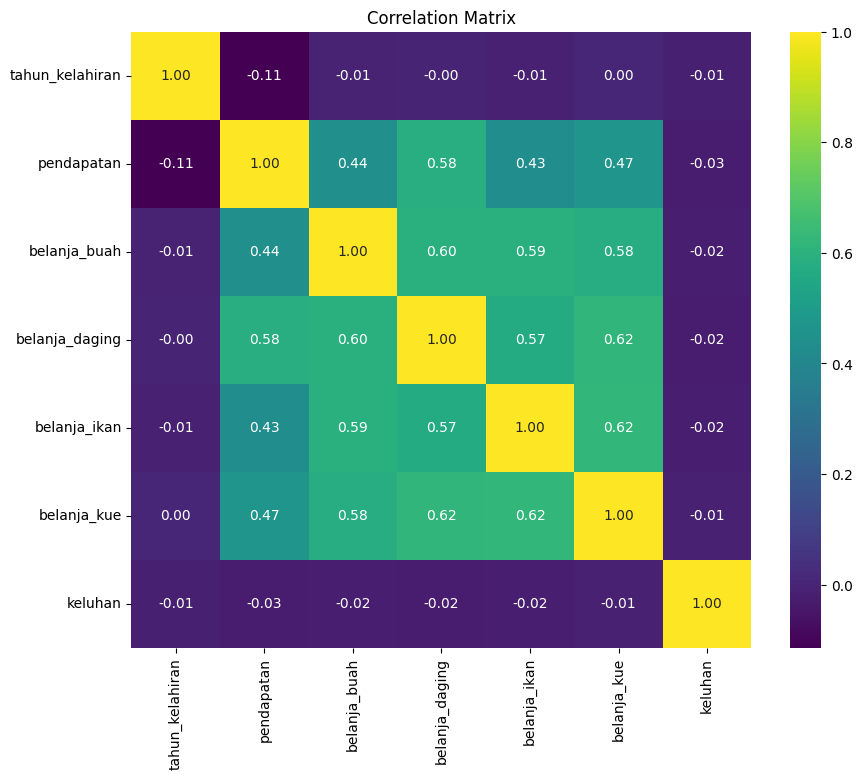

In [15]:
corr = test[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Kita dapat melihat bahwa nilai yang mendekati +1 berarti memiliki hubungan yang signifkan atau kuat. Kita dapat melihat semakin tinggi pendapatan seseorang maka semakin tinggi minat mereka untuk belanja daging dan kue, tetapi mereka sedikit mengeluh. Begitu seterusnya.

In [16]:
test.drop(columns='tanggal_menjadi_anggota', inplace=True)

In [17]:
test[test.select_dtypes(exclude=['number']).columns]


,pendidikan,status_pernikahan
0,Sarjana,NaN
1,Doktor,Menikah
2,SMA,Menikah
3,Doktor,Menikah
4,Sarjana,Rencana Menikah
...,...,...
3813,Magister,Sendiri
3814,Sarjana,Menikah
3815,Magister,Rencana Menikah
3816,Sarjana,Rencana Menikah


In [18]:
print('Nilai unik data kategorikal:')
print(f'pendidikan: {test["pendidikan"].unique()}')
print(f'status pernikahan: {test["status_pernikahan"].unique()}')

Nilai unik data kategorikal:
pendidikan: ['Sarjana' 'Doktor' 'SMA' 'Magister' nan 'SMP' '5']
status pernikahan: [nan 'Menikah' 'Rencana Menikah' 'Sendiri' 'Cerai Mati' 'Cerai' '5']


In [19]:
test['pendidikan'] = test['pendidikan'].replace('5', np.nan)
test['status_pernikahan'] = test['status_pernikahan'].replace('5', np.nan)

Encoding

In [20]:
label_encoding = {
    'SMP': 1,
    'SMA': 2,
    'Sarjana': 3,
    'Magister': 4,
    'Doktor': 5,
}

test['pendidikan'] = test['pendidikan'].map(label_encoding)


In [21]:
label_mapping = {
    'Menikah': 1,
    'Rencana Menikah': 2,
    'Sendiri': 3,
    'Cerai Mati': 4,
    'Cerai' : 5
}
test['status_pernikahan'] = test['status_pernikahan'].map(label_mapping)

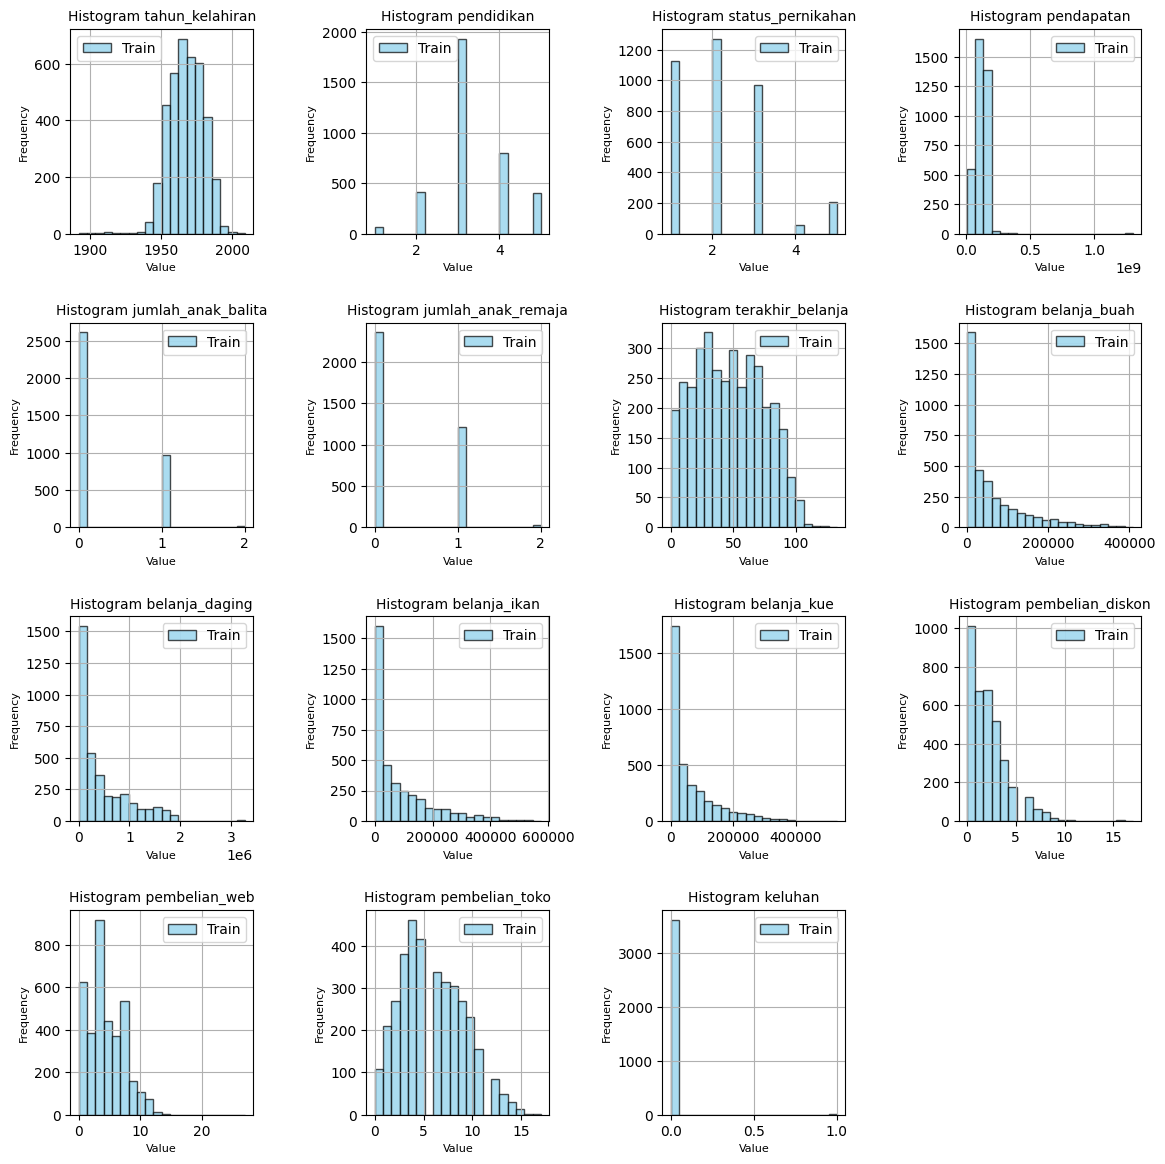

In [22]:
columns_to_plot = [col for col in test.columns if col != 'ID']
num_cols = len(columns_to_plot)
num_rows = (num_cols + 3) // 4

fig_width = 12
fig_height = 3 * num_rows

fig, axes = plt.subplots(num_rows, 4, figsize=(fig_width, fig_height))

for i, column in enumerate(columns_to_plot):
    ax = axes[i // 4, i % 4]
    ax.hist(test[column], bins=20, color='skyblue', alpha=0.7, edgecolor='black', label='Train')
    ax.set_title(f'Histogram {column}', fontsize=10)
    ax.set_xlabel('Value', fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)
    ax.legend()
    ax.grid(True)

for i in range(num_cols, num_rows * 4):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(pad=2.0)
plt.show()

Terlihat yang distribusi yang berbeda adalah pendapata. Pada data test pendepatan mencapai 1500, sedangkan pada data train 500.

In [23]:
test.isnull().sum()

,0
ID,0
tahun_kelahiran,0
pendidikan,206
status_pernikahan,183
pendapatan,203
jumlah_anak_balita,209
jumlah_anak_remaja,210
terakhir_belanja,201
belanja_buah,186
belanja_daging,195


Setelah di cek, ternyata banyak data yang missing value. Oleh sebab itu kita dapat melakukan imputasi.

In [24]:
test_second = test.copy()

In [25]:
test_second = test.fillna(method='bfill')


<ipython-input-25-d7c473c6ed3f>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_second = test.fillna(method='bfill')


In [26]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iterative_imputer = IterativeImputer(
    random_state=69,   # random_state untuk konsistensi hasil
    max_iter=10,       # jumlah iterasi
    tol=1e-3,          # toleransi untuk konvergensi
    min_value=None,    # nilai minimum yang diperbolehkan
    max_value=None     # nilai maksimum yang diperbolehkan
)

IterativelyImputed = iterative_imputer.fit_transform(test)
test = pd.DataFrame(IterativelyImputed, columns=test.columns).round()

In [27]:
test.isnull().sum()

,0
ID,0
tahun_kelahiran,0
pendidikan,0
status_pernikahan,0
pendapatan,0
jumlah_anak_balita,0
jumlah_anak_remaja,0
terakhir_belanja,0
belanja_buah,0
belanja_daging,0


Tidak ada data lagi yang missing value karena kita telah melakukan imputasi. Kode tersebut digunakan untuk mengisi nilai yang hilang dalam DataFrame test dengan teknik yang disebut Iterative Imputer.